<a href="https://colab.research.google.com/github/faizput/Weed-Image-Processing-FYP-22-23/blob/main/Model_Evaluation_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #data manipulation and analysis
import numpy as np #numerical operation
import tensorflow as tf #ml and dl
import matplotlib.pyplot as plt #data visualization
import matplotlib.image as mpimg #image handling
import seaborn as sns #statistical data visualization
import pathlib # file paths
import random # generate random numbers
import os # interact with operating system

In [ ]:
train_path = '/content/drive/MyDrive/Local Weed/Dataset/train'
validation_path = '/content/drive/MyDrive/Local Weed/Dataset/val'

In [ ]:
img_size = 224
batch = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                  )

test_val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    batch_size = batch,
                                                    class_mode = "categorical",
                                                    shuffle = True,
                                                    target_size = (img_size,img_size)
                                                    )

val_generator = test_val_datagen.flow_from_directory(directory = validation_path,
                                                    batch_size = 1,
                                                    shuffle=False,
                                                    class_mode = "categorical",
                                                    target_size = (img_size,img_size)
                                                    )

Found 1276 images belonging to 2 classes.
Found 273 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Local Weed/Model/model VGG16-10-32.h5')

In [ ]:
classes = []
for i in os.listdir(validation_path):
    classes+=[i]

classes

['Narrow', 'Broad']

In [ ]:
test_loss, test_acc = model.evaluate(train_generator, steps=len(train_generator), verbose=1)
print('Loss: %.4f' % (test_loss * 100.0))
print('Accuracy: %.4f' % (test_acc * 100.0))

40/40 [==============================] - 840s 21s/step - loss: 0.0310 - accuracy: 0.9859
Loss: 3.0990
Accuracy: 98.5893


In [ ]:
test_loss, test_acc = model.evaluate(val_generator, steps=len(val_generator), verbose=1)
print('Loss: %.4f' % (test_loss * 100.0))
print('Accuracy: %.4f' % (test_acc * 100.0))

273/273 [==============================] - 175s 642ms/step - loss: 0.0596 - accuracy: 0.9817
Loss: 5.9617
Accuracy: 98.1685


In [ ]:
predictions = np.argmax(model.predict(val_generator),axis=1)
labels = val_generator.classes
predictions , labels

273/273 [==============================] - 188s 689ms/step


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.4f' % (accuracy_score(labels, predictions)*100))
print('Precision: %.4f' % (precision_score(labels, predictions, average='macro')*100))
print('Recall: %.4f' % (recall_score(labels, predictions, average='macro')*100))
print('F1 Score: %.4f' % (f1_score(labels, predictions, average='macro')*100))

Accuracy: 98.1685
Precision: 98.1804
Recall: 98.1804
F1 Score: 98.1685


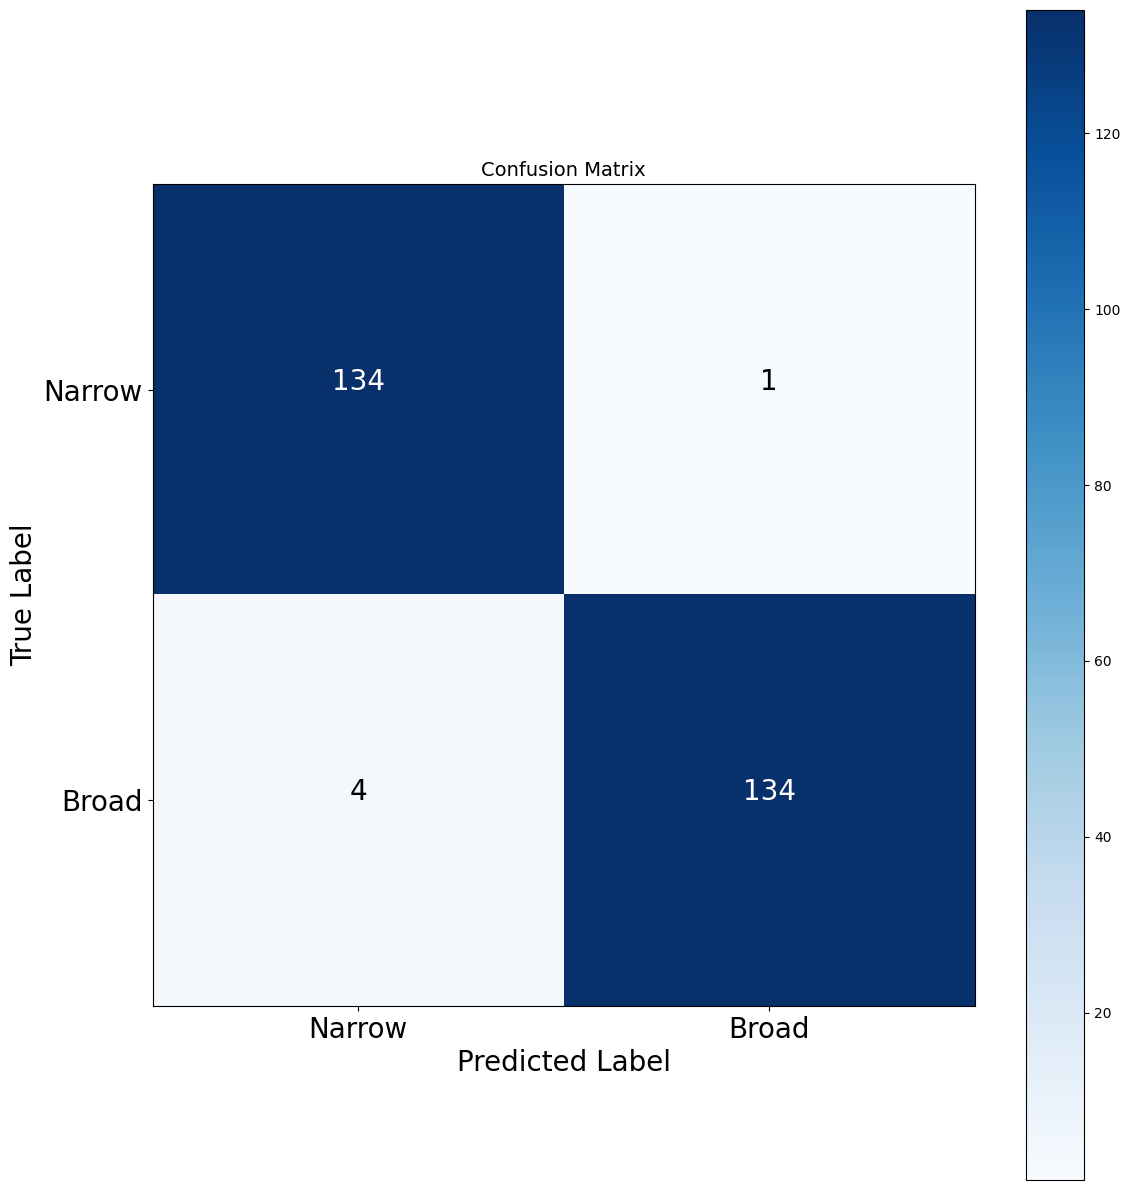

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' and 'predictions' are already defined
class_names = classes  # Replace with your actual class names

# Get the confusion matrix
cm = skplt.metrics.confusion_matrix(labels, predictions)

# Create a custom confusion matrix plot with larger font size
plt.figure(figsize=(12, 12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=14)
plt.colorbar()

# Set tick labels and labels font size
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=20)
plt.yticks(tick_marks, class_names, fontsize=20)

# Add the actual values in the plot
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=20)

plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, predictions, target_names=classes))

              precision    recall  f1-score   support

      Narrow       0.97      0.99      0.98       135
       Broad       0.99      0.97      0.98       138

    accuracy                           0.98       273
   macro avg       0.98      0.98      0.98       273
weighted avg       0.98      0.98      0.98       273



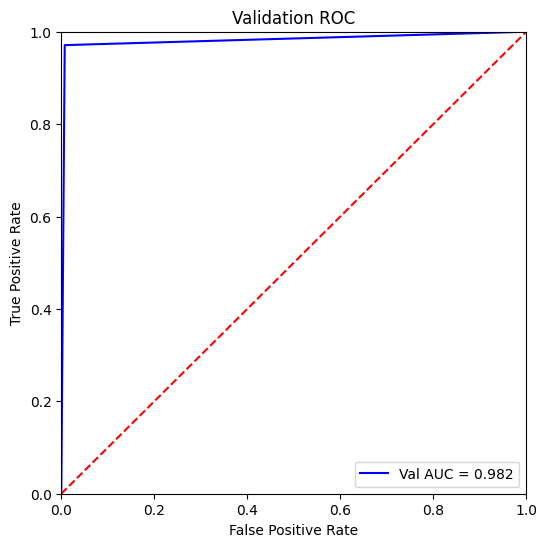

In [ ]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
ResultMap = {
    0: 'Broad',
    1: 'Narrow',
}

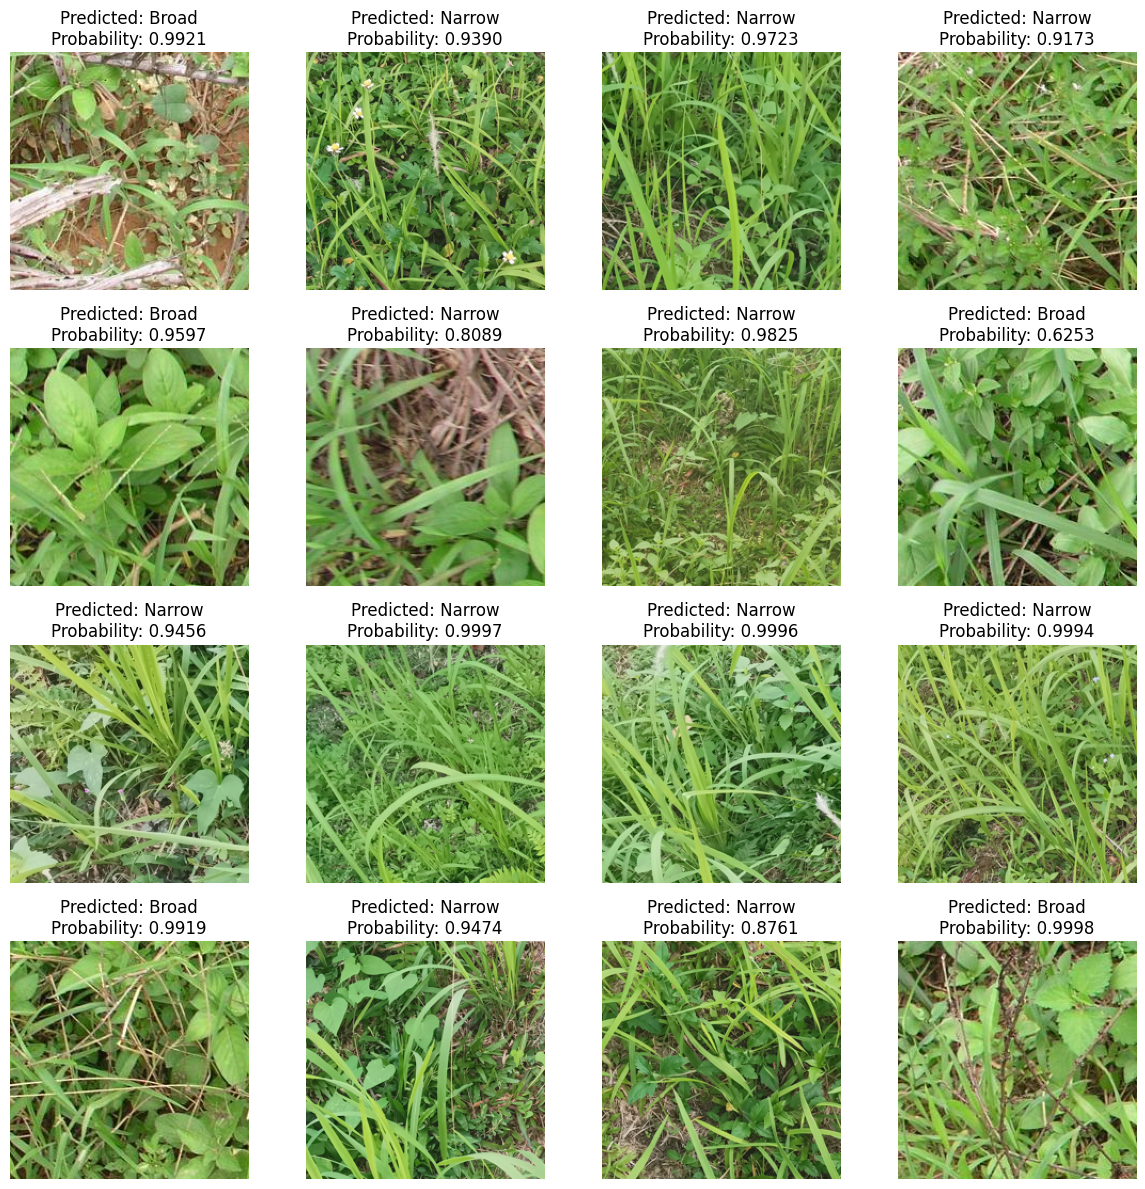

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np

def predict_random_images(image_directory, num_images):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]
    # Check if there are enough image files
    if len(image_files) < num_images:
        print('Insufficient number of image files in the directory.')
        return

    # Randomly select and predict multiple images
    random_image_files = random.sample(image_files, num_images)

    # Initialize arrays to store images and predictions
    images = []
    predictions = []

    for random_image_file in random_image_files:
        random_image_path = os.path.join(image_directory, random_image_file)

        # Load the randomly selected image
        test_image = load_img(random_image_path, target_size=(224, 224))
        test_image = img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)

        # Store the image in the images array
        images.append(test_image)

        # Make predictions and store the result in the predictions array
        result = model.predict(test_image, verbose=0)
        predictions.append(result)

    # Create a 4x4 grid for displaying the images and predictions
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i][0] / 255.0)  # Rescale the image to [0, 1]
        plt.title('Predicted: ' + ResultMap[np.argmax(predictions[i])] + '\nProbability: {:.4f}'.format(np.max(predictions[i])))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Specify the directory containing the images
image_directory = '/content/drive/MyDrive/Local Weed/Dataset/test/Mixed'

# Specify the number of images to predict
num_images = 16  # Set it to 16 for a 4x4 grid

# Call the function to predict random images and display the 4x4 grid
predict_random_images(image_directory, num_images)
